In [1]:
import os

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]='0'
os.environ["HF_HOME"]="~/codes/.cache/huggingface"

In [2]:
from accelerate.utils import ProjectConfiguration, set_seed

In [3]:
import torch
import random
import numpy as np

def set_seeds(seed):
    set_seed(seed)
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    
set_seeds(42)

In [4]:
from torchvision import transforms
from diffusers import DDPMPipeline, DDIMPipeline, DDPMScheduler, DDIMScheduler, UNet2DModel

In [5]:
import pickle

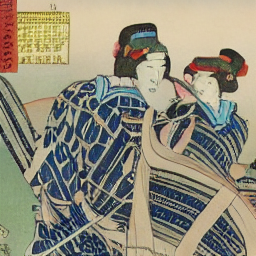

In [6]:
import pandas as pd
df = pd.DataFrame()
df['label'] = ['ukiyo_e']*500+['post_impressionism']*500
df['path'] = ['{}/{}.png'.format('saved/5000-0.5/gen', i) for i in range(1000)]

from datasets import DatasetDict, Dataset, load_dataset, Image
dataset = DatasetDict({
"train": Dataset.from_dict({
    "image": df['path'].tolist(),
    "label": df['label'].tolist(),
}).cast_column("image", Image()),})
gen_dataset = dataset["train"]
gen_dataset[0]["image"]

In [7]:
class Args():
    
    pretrained_model_name_or_path="lambdalabs/miniSD-diffusers"
    

    resolution=256
    center_crop=True
    random_flip=False

    dataloader_num_workers=8
    
    seed=42
    gen_seed=0    

    train_batch_size=256

    ddpm_num_steps=1000
    ddpm_num_inference_steps=50
    ddpm_beta_schedule='linear'

args=Args()


In [8]:
with open('./data/indices/5000-0.5/counter/idx-gen-sampled.pkl', 'rb') as handle:
    test_index = pickle.load(handle)
test_index[0:5]

[993, 859, 298, 553, 672]

In [9]:
from diffusers import StableDiffusionPipeline, EulerAncestralDiscreteScheduler
from diffusers import DDIMScheduler

In [10]:
index_image_list = []
for index, my_i in enumerate(test_index):
    print(index, my_i)
        
    print(index, my_i)
    k_image_list = []
    for k in [
        # 500, 
        1000
    ]:
        method_image_list = []
        for method in ['Random', 'TRAK', 
                       'Ours'
                      ]:
            # If passed along, set the training seed now.
            if args.seed is not None:
                set_seeds(args.seed)
            ####    
            print(args.pretrained_model_name_or_path)
            pipe = StableDiffusionPipeline.from_pretrained(args.pretrained_model_name_or_path, 
                                                           torch_dtype=torch.float16).to('cuda')
            ####
            pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)
            print('DDIM!')
            ####
            def dummpy(images, **kwargs):
                return images, False
            
            pipe.safety_checker = dummpy
            ####
            args.model_path = "./saved/5000-0.5/counter/sd-lora-sub-{}-{}-{}-42".format(index, k, method)
            # args.model_path = "./saved/5000-0.5/counter/sd-lora"
            print(args.model_path)
            ####    
            pipe.unet.load_attn_procs(args.model_path)
            pipe.unet.eval()
            ####
            
            generator = [torch.Generator('cpu').manual_seed(my_i)]
            if my_i>=500:
                prompt_list = ['a post impressionism painting']
            else:
                prompt_list = ['a ukiyo e painting']
                
            images = pipe(prompt_list, 
                  height=args.resolution, 
                  width=args.resolution,
                  num_inference_steps=50, 
                      generator=generator, 
                      eta=0.0).images
        
            method_image_list.append(images[0])
        k_image_list.append(method_image_list)
    index_image_list.append(k_image_list)
    # break

0 993
0 993
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-0-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-0-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-0-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

1 859
1 859
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-1-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-1-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-1-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

2 298
2 298
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-2-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-2-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-2-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

3 553
3 553
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-3-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-3-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-3-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

4 672
4 672
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-4-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-4-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-4-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

5 971
5 971
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-5-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-5-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-5-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

6 27
6 27
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-6-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-6-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-6-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

7 231
7 231
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-7-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-7-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-7-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

8 306
8 306
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-8-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-8-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-8-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

9 706
9 706
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-9-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-9-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-9-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

10 496
10 496
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-10-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-10-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-10-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

11 558
11 558
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-11-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-11-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-11-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

12 784
12 784
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-12-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-12-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-12-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

13 239
13 239
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-13-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-13-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-13-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

14 578
14 578
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-14-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-14-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-14-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

15 55
15 55
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-15-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-15-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-15-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

16 906
16 906
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-16-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-16-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-16-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

17 175
17 175
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-17-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-17-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-17-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

18 14
18 14
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-18-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-18-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-18-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

19 77
19 77
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-19-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-19-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-19-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

20 31
20 31
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-20-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-20-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-20-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

21 481
21 481
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-21-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-21-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-21-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

22 310
22 310
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-22-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-22-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-22-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

23 311
23 311
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-23-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-23-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-23-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

24 883
24 883
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-24-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-24-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-24-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

25 788
25 788
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-25-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-25-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-25-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

26 45
26 45
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-26-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-26-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-26-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

27 103
27 103
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-27-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-27-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-27-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

28 760
28 760
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-28-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-28-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-28-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

29 1
29 1
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-29-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-29-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-29-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

30 823
30 823
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-30-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-30-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-30-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

31 710
31 710
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-31-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-31-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-31-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

32 614
32 614
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-32-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-32-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-32-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

33 790
33 790
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-33-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-33-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-33-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

34 408
34 408
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-34-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-34-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-34-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

35 736
35 736
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-35-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-35-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-35-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

36 957
36 957
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-36-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-36-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-36-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

37 366
37 366
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-37-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-37-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-37-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

38 918
38 918
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-38-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-38-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-38-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

39 267
39 267
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-39-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-39-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-39-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

40 230
40 230
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-40-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-40-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-40-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

41 996
41 996
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-41-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-41-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-41-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

42 635
42 635
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-42-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-42-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-42-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

43 698
43 698
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-43-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-43-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-43-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

44 251
44 251
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-44-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-44-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-44-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

45 783
45 783
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-45-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-45-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-45-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

46 819
46 819
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-46-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-46-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-46-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

47 141
47 141
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-47-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-47-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-47-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

48 316
48 316
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-48-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-48-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-48-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

49 587
49 587
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-49-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-49-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-49-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

50 331
50 331
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-50-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-50-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-50-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

51 295
51 295
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-51-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-51-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-51-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

52 262
52 262
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-52-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-52-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-52-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

53 432
53 432
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-53-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-53-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-53-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

54 862
54 862
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-54-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-54-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-54-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

55 582
55 582
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-55-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-55-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-55-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

56 272
56 272
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-56-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-56-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-56-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

57 270
57 270
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-57-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-57-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-57-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

58 987
58 987
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-58-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-58-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-58-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

59 319
59 319
lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-59-1000-Random-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-59-1000-TRAK-42


  0%|          | 0/50 [00:00<?, ?it/s]

lambdalabs/miniSD-diffusers


vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


DDIM!
./saved/5000-0.5/counter/sd-lora-sub-59-1000-Ours-42


  0%|          | 0/50 [00:00<?, ?it/s]

In [11]:
test_index_ = []
for index, my_i in enumerate(test_index):
    
    # if index%10>=1:
        # continue
    test_index_.append(my_i)
test_index_

[993,
 859,
 298,
 553,
 672,
 971,
 27,
 231,
 306,
 706,
 496,
 558,
 784,
 239,
 578,
 55,
 906,
 175,
 14,
 77,
 31,
 481,
 310,
 311,
 883,
 788,
 45,
 103,
 760,
 1,
 823,
 710,
 614,
 790,
 408,
 736,
 957,
 366,
 918,
 267,
 230,
 996,
 635,
 698,
 251,
 783,
 819,
 141,
 316,
 587,
 331,
 295,
 262,
 432,
 862,
 582,
 272,
 270,
 987,
 319]

In [12]:
j = 5

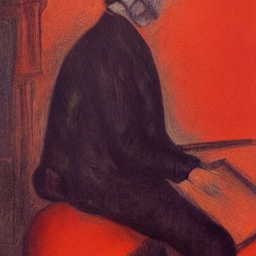

In [13]:
gen_dataset[test_index_[j]]['image']

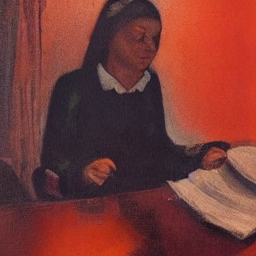

In [14]:
index_image_list[j][0][0]

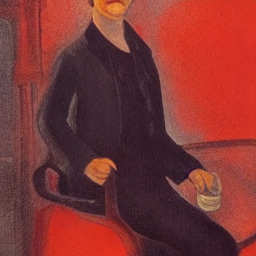

In [15]:
index_image_list[j][0][1]

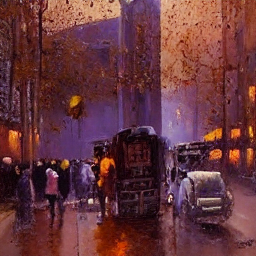

In [16]:
index_image_list[j][0][2]

In [17]:
with open("./counter/saved.pkl", 'wb') as handle:
    pickle.dump(index_image_list, handle)